# Jaringan berlapis banyak

<p align=”justify”>Pada bagian ini saya akan mengajarkan pada pembaca untuk membangun arsitektur <i>feed-forward multi-layer neural networks</i> (Svozil dkk., 1997) sederhana dengan 10 perseptron di <i>hidden layer</i> pertama, 6 perseptron di <i>hidden layer</i> kedua, dan 1 perseptron <i>output</i>.</p>

<p align=”justify”>Ilustrasinya saya tampilkan pada gambar berikut ini yang saya produksi menggunakan perangkat <a href="https://alexlenail.me/NN-SVG/">NN-SVG</a> yang disediakan secara gratis oleh Alex Lenail (mantan peneliti di Google Brain, saat ini mahasiswa doktoral sistem komputasi biologi di MIT):</p>

<img src="dnn1.png" alt="DeepNetsSandy" style="width: 1000px;"/>

*Ok*, daripada seperti kebanyakan politis yang NATO (*No Action Talks Only*), baiknya kita awali perjalanan komputasi kita dengan mengimpor beberapa pustaka seperti biasa:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
plt.xkcd() # biar lucu
plt.style.use('ggplot') # karena saya pengguna R juga biar bagus, Bro plotnya!
%matplotlib inline

<p align=”justify”>Berbeda dengan pada pembahasan jaringan berlapis tunggal, di mana saya memperlakukan ANN sebagai sistem pengklasifikasi, kini kita akan menggunakan ANN sebagai <i>regressor</i> dari persamaan sebagai berikut:</p> 
$$y = 3x^{2} + 5$$

Untuk itu, kita perlu mendefinisikan beberapa parameter terlebih dahulu:

In [2]:
nilai_min = -20
nilai_maks = 20
jumlah_titik = 150

x = np.linspace(nilai_min, nilai_maks, jumlah_titik)
y = 3*np.square(x) + 5

Dengan mempertimbangkan efisiensi sumberdaya komputasi saya yang sangat terbatas, maka ada baiknya kita lakukan normalisasi data terlebih dahulu:

In [3]:
y /= np.linalg.norm(y)
y

array([0.17967734, 0.17490604, 0.17019922, 0.16555687, 0.160979  ,
       0.15646561, 0.1520167 , 0.14763226, 0.1433123 , 0.13905682,
       0.13486581, 0.13073928, 0.12667723, 0.12267965, 0.11874655,
       0.11487793, 0.11107379, 0.10733412, 0.10365893, 0.10004822,
       0.09650198, 0.09302022, 0.08960294, 0.08625014, 0.08296181,
       0.07973796, 0.07657858, 0.07348369, 0.07045327, 0.06748732,
       0.06458586, 0.06174887, 0.05897636, 0.05626832, 0.05362476,
       0.05104568, 0.04853108, 0.04608095, 0.0436953 , 0.04137413,
       0.03911744, 0.03692522, 0.03479748, 0.03273421, 0.03073542,
       0.02880111, 0.02693128, 0.02512592, 0.02338504, 0.02170864,
       0.02009671, 0.01854927, 0.01706629, 0.0156478 , 0.01429378,
       0.01300424, 0.01177918, 0.01061859, 0.00952248, 0.00849085,
       0.0075237 , 0.00662102, 0.00578282, 0.00500909, 0.00429984,
       0.00365507, 0.00307478, 0.00255897, 0.00210763, 0.00172076,
       0.00139838, 0.00114047, 0.00094704, 0.00081809, 0.00075

Kemudian kita lakukan pra-pemrosesan data dan hasilnya kita visualisasikan agar terbayang seperti apa data yang hendak kita tangani ini:

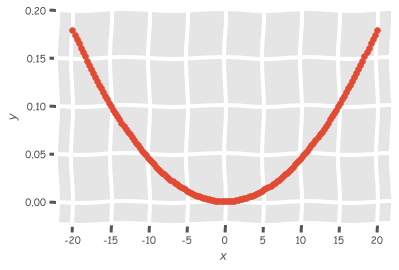

In [4]:
# pra-pemrosesan
fitur = x.reshape(jumlah_titik,1)
label = y.reshape(jumlah_titik,1)

# visualisasi
plt.scatter(fitur, label);
plt.xlabel('$x$');
plt.ylabel('$y$');

<p align=”justify”>Lalu kita definisikan model <i>feed-forward multi-layer neural networks</i> dengan menggunakan fungsi <a href="https://pythonhosted.org/neurolab/ex_newff.html"><code>newff</code></a></p> pada pustaka NeuroLab:

In [5]:
# 10 perseptron di hidden layer 1, 6 perseptron di hidden layer 2, 1 perseptron output 
mnn = nl.net.newff([[nilai_min, nilai_maks]], [10,6,1])

Untuk men-*training* model yang telah kita definisikan, saya memilih menggunakan algoritma yang paling sederhana, yakni *gradient descent* (Ruder, 2017):

In [6]:
mnn.trainf = nl.train.train_gd

Sesudah itu, tinggal kita latih model-nya seperti biasa dengan hasil akhir galatnya hanya 0,01 dan kita visualisasikan prosesnya dalam bentuk diagram garis sederhana:

Epoch: 100; Error: 0.08215027262587492;
Epoch: 200; Error: 0.02098621723962554;
Epoch: 300; Error: 0.014578715088583605;
Epoch: 400; Error: 0.048040222178511095;
Epoch: 500; Error: 0.011805378213184553;
Epoch: 600; Error: 0.010520525822746438;
The goal of learning is reached


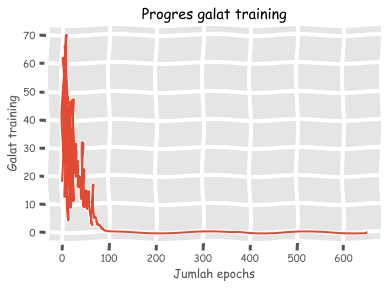

In [7]:
# training
progres_galat = mnn.train(fitur, label, epochs=2000, show=100, goal=0.01)

# visualisasi
plt.plot(progres_galat);
plt.xlabel('Jumlah epochs');
plt.ylabel('Galat training');
plt.title('Progres galat training');

Kemudian kita melakukan prediksi dan memvisualisasikan hasilnya:

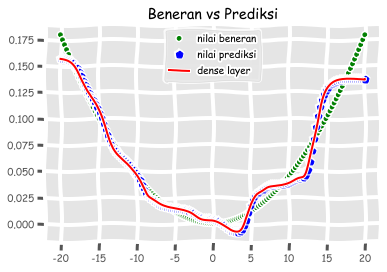

In [12]:
# prediksi pakai datanya sendiri
output = mnn.sim(fitur)
y_pred = output.reshape(jumlah_titik)

# dense layer
x_dense = np.linspace(nilai_min, nilai_maks, jumlah_titik*2)
y_dense_pred = mnn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.plot(x, y, '.', label='nilai beneran', color='green');
plt.plot(x, y_pred, 'p', label='nilai prediksi', color='blue');
plt.plot(x_dense, y_dense_pred, '-',label ='dense layer', color='red');
plt.title('Beneran vs Prediksi');
plt.legend();

Sangat *gampang*, kan?

<p align=”justify”>Tentu saja tidak, <i>Sis-Bro</i>! Di proyek <i>deep learning</i> sungguhan, kita harus melakukan pra-pemrosesan data yang jauh lebih rumit dan juga harus menerapkan konsep - konsep seperti <i>cross-validation</i> dan <i>confusion matrix</i> untuk pengujian akurasi model supaya tidak <i>ngaco</i> dan menimbulkan kerugian saat menghasilkan prediksi. Hal - hal seperti ini lebih mudah diterapkan dengan menggunakan pustaka pemelajaran mendalam Python yang lebih populer seperti Keras (<i>bikinan</i> idola saya, F. Chollet), TensorFlow, PyTorch, (atau bahkan) scikit-learn. Nanti tutorialnya akan saya buat kalau saya sudah punya <i>laptop</i> yang mendukung komputasi menggunakan NVIDIA CUDA (bagi pembaca yang tertarik buat membelikan atau punya kenalan anak orang kaya yang <i>laptop</i>-nya hanya dipakai untuk buka MS Office, boleh disumbangkan ke saya untuk mempercepat tugas ke-<i>nabi</i>-an saya di dunia ini).</p>